<a href="https://colab.research.google.com/github/vbanai/Unsupervised-learning-clustering/blob/main/Italian_wine_unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
os.environ['KAGGLE_USERNAME'] = "viktorbanai" # username from the json file
os.environ['KAGGLE_KEY'] = "9431db56af1a1a63cab88b4e516a2248" # key from the json file
!kaggle datasets download -d harrywang/wine-dataset-for-clustering # api copied from kaggle


  0% 0.00/4.36k [00:00<?, ?B/s]
100% 4.36k/4.36k [00:00<00:00, 8.50MB/s]


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


In [ ]:
!mkdir file_destination
!unzip -u "/content/wine-dataset-for-clustering.zip" -d "/content/file_destination"

Archive:  /content/wine-dataset-for-clustering.zip
  inflating: /content/file_destination/wine-clustering.csv  


In [ ]:
wine_dataset=pd.read_csv("/content/file_destination/wine-clustering.csv")
wine_dataset.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.Alcohol=wine_dataset.Alcohol
df2=df[df.Alcohol>14]
df2

In [ ]:
wine_dataset.isna().sum()

In [ ]:
wine_dataset.skew()  #Skewness > zero = that there is more weight in the left side of the data. Skewness < zero =  there is more weight in the right side of the data


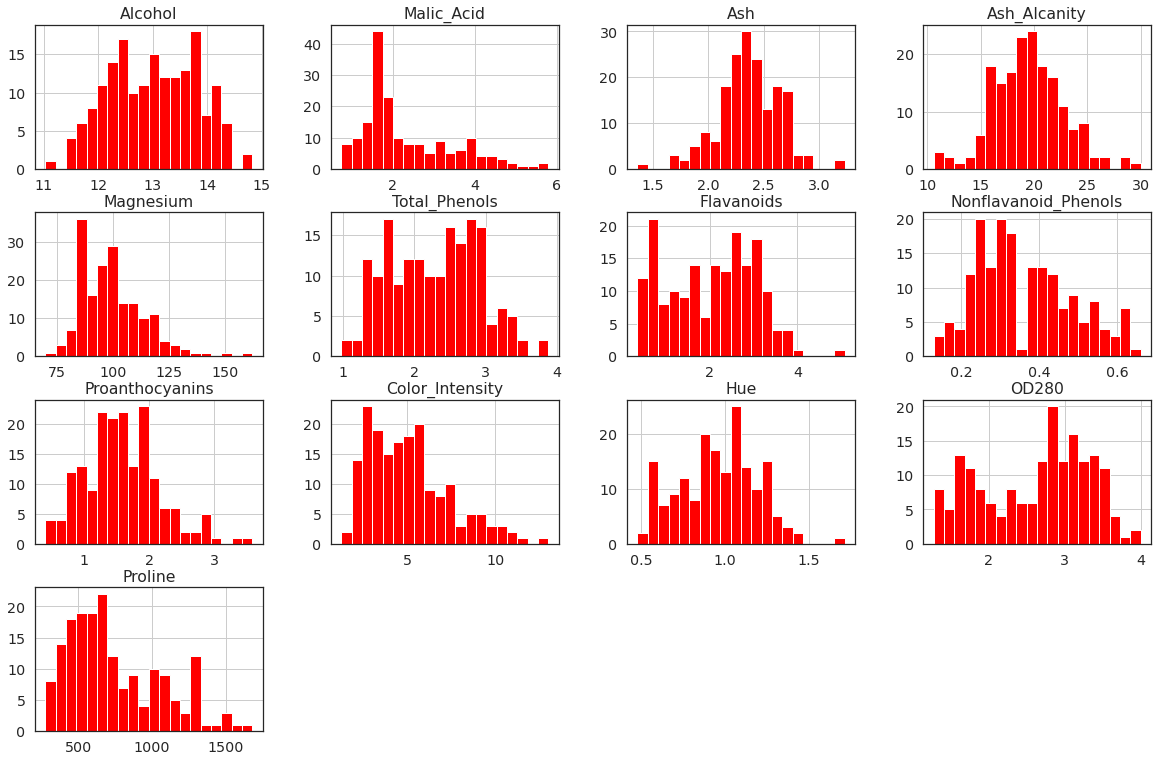

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,13)})
ax=wine_dataset.hist(bins=20,color='red' )

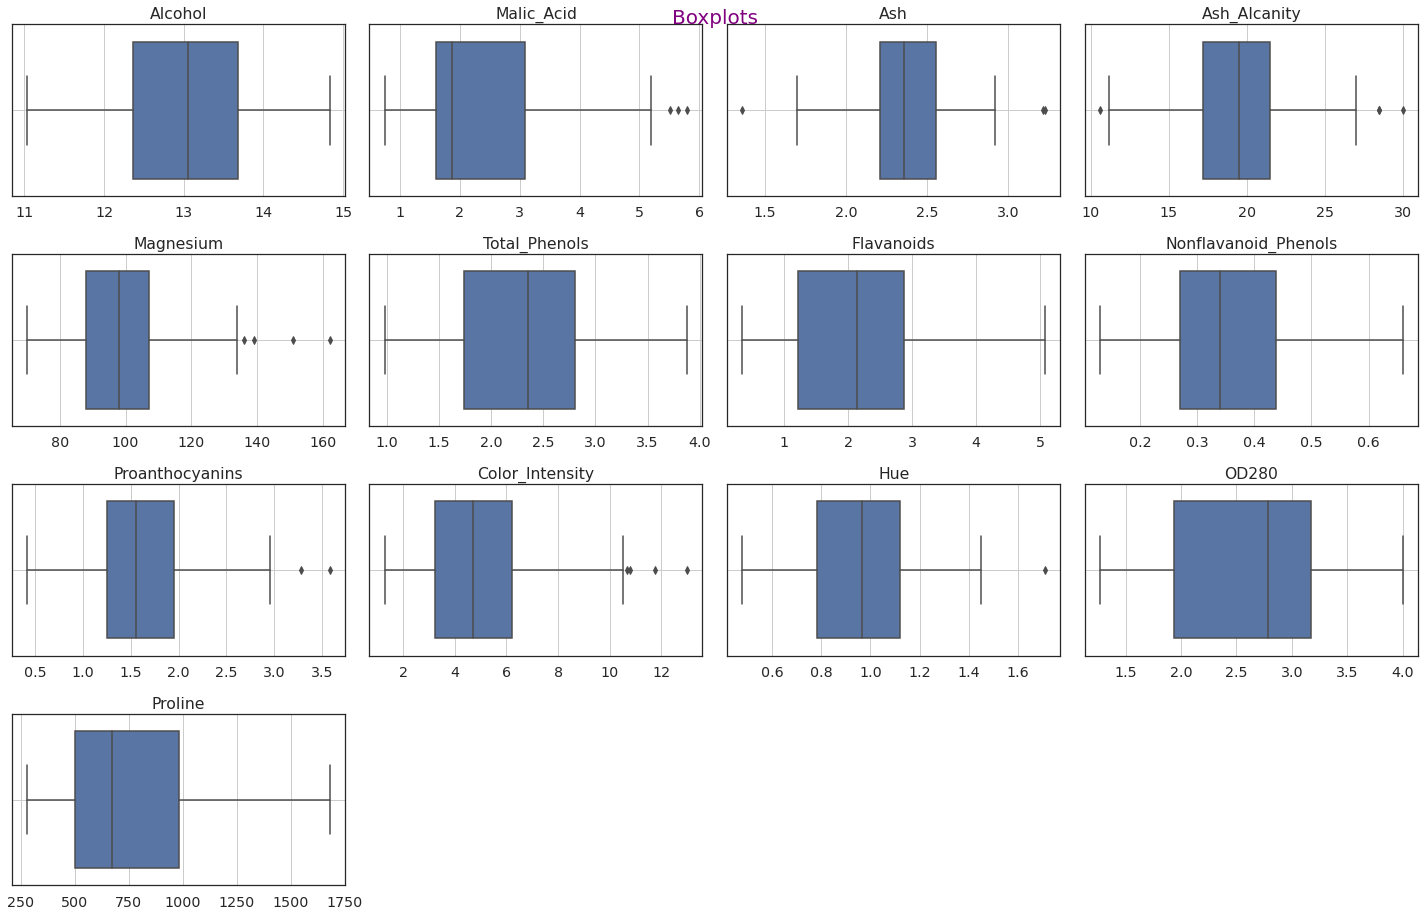

In [ ]:
sns.set(style='white',font_scale=1.3, rc={'figure.figsize':(20,13)})



plt.figure(figsize=(20, 13))
plt.suptitle('Boxplots', fontsize=20, color='purple')
t=[column for column in wine_dataset]
for i in range(13):
    plt.subplot(4, 4, i+1)
    sns.boxplot(x=wine_dataset[t[i]])
    plt.ylabel(None)
    plt.xlabel(None)
    plt.title(t[i])
    plt.grid()
    
plt.tight_layout()



In [ ]:
from sklearn.preprocessing import StandardScaler

std_scaler = StandardScaler()
data_cluster=wine_dataset.copy()
data_cluster[data_cluster.columns]=std_scaler.fit_transform(data_cluster)

In [ ]:
#Checking if the Standardization was made correctly, check if the  mean=0 and std=1
data_cluster.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02,1.780000e+02
mean,-8.619821e-16,-8.357859e-17,-8.657245e-16,-1.160121e-16,-1.995907e-17,-2.972030e-16,-4.016762e-16,4.079134e-16,-1.699639e-16,-1.247442e-18,3.717376e-16,2.919013e-16,-7.484650e-18
std,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00,-3.679162e+00,-2.671018e+00,-2.088255e+00,-2.107246e+00,-1.695971e+00,-1.868234e+00,-2.069034e+00,-1.634288e+00,-2.094732e+00,-1.895054e+00,-1.493188e+00
25%,-7.882448e-01,-6.587486e-01,-5.721225e-01,-6.891372e-01,-8.244151e-01,-8.854682e-01,-8.275393e-01,-7.401412e-01,-5.972835e-01,-7.951025e-01,-7.675624e-01,-9.522483e-01,-7.846378e-01
50%,6.099988e-02,-4.231120e-01,-2.382132e-02,1.518295e-03,-1.222817e-01,9.595986e-02,1.061497e-01,-1.760948e-01,-6.289785e-02,-1.592246e-01,3.312687e-02,2.377348e-01,-2.337204e-01
75%,8.361286e-01,6.697929e-01,6.981085e-01,6.020883e-01,5.096384e-01,8.089974e-01,8.490851e-01,6.095413e-01,6.291754e-01,4.939560e-01,7.131644e-01,7.885875e-01,7.582494e-01
max,2.259772e+00,3.109192e+00,3.156325e+00,3.154511e+00,4.371372e+00,2.539515e+00,3.062832e+00,2.402403e+00,3.485073e+00,3.435432e+00,3.301694e+00,1.960915e+00,2.971473e+00


In [ ]:
#Principal Component Analysis to reduce its dimension and make it "plottable" 

from sklearn.decomposition import PCA
pca_2 = PCA(2)
pca_2_result = pca_2.fit_transform(data_cluster)

print ('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Cumulative variance explained by 2 principal components: 55.41%


In [ ]:
#making PD from numpy
pca_2_result_df = pd.DataFrame(pca_2_result, columns=["PC1", "PC2"])

pca_2_result_df

,PC1,PC2
0,3.316751,-1.443463
1,2.209465,0.333393
2,2.516740,-1.031151
3,3.757066,-2.756372
4,1.008908,-0.869831
...,...,...
173,-3.370524,-2.216289
174,-2.601956,-1.757229
175,-2.677839,-2.760899
176,-2.387017,-2.297347


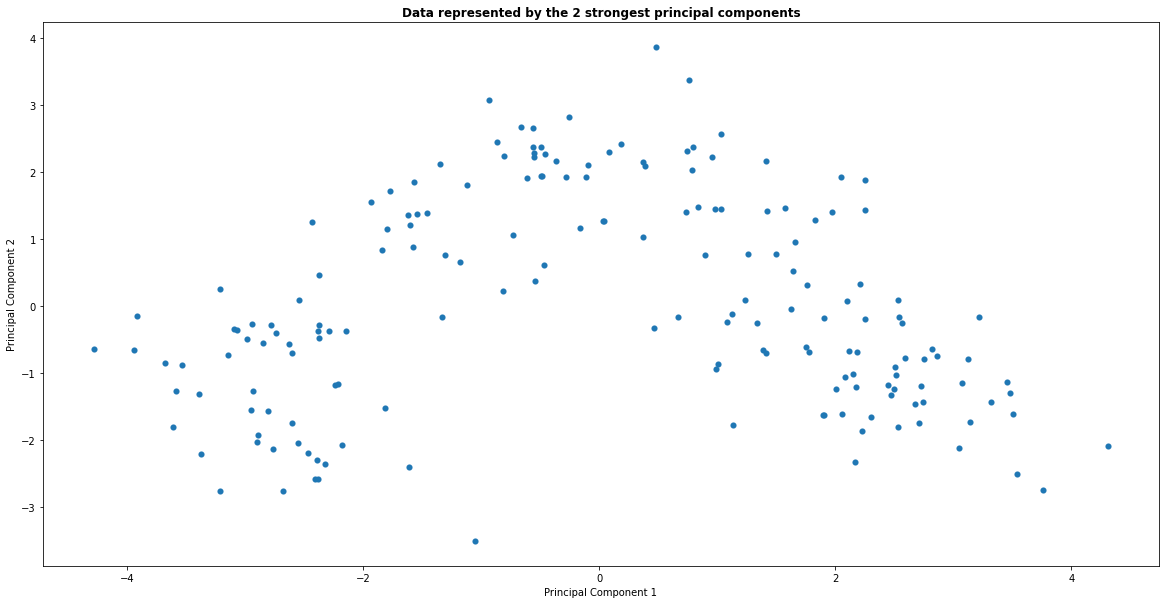

In [ ]:
plt.rcParams['figure.figsize'] = (20, 10)
plt.scatter(pca_2_result_df.PC1, pca_2_result_df.PC2, lw=0.1)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Data represented by the 2 strongest principal components',fontweight='bold')
plt.show()

In [ ]:
sse = []  #sum of squarred error
k_rng = range(1,10)
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(data_cluster)
    sse.append(km.inertia_)


In [ ]:
#silhouette score to validate the elbow rule
from tqdm import tqdm
from sklearn.metrics import silhouette_score
import sklearn.cluster as cluster

silhouette = {}
for i in tqdm(range(2,10)):
    kmeans = cluster.KMeans(n_clusters=i)
    kmeans.fit(data_cluster)
    silhouette[i] = silhouette_score(data_cluster, kmeans.labels_, metric='euclidean')



In [ ]:
silhouette

Text(0.5, 0, 'Number of Clusters')

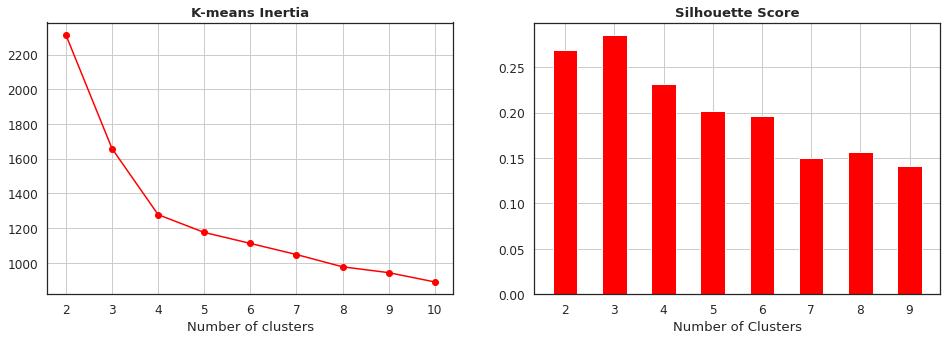

In [ ]:
#sns.set(style='white',font_scale=1.1, rc={'figure.figsize':(16,5)})

plt.subplot(1, 2, 1)

plt.plot(range(2,len(k_rng)+2), sse, marker='o',color='red')
plt.xlabel('Number of clusters')
plt.title('K-means Inertia',fontweight='bold')
plt.grid(True)

plt.subplot(1, 2, 2)

plt.bar(range(len(silhouette)), list(silhouette.values()), align='center',color= 'red',width=0.5)
plt.xticks(range(len(silhouette)), list(silhouette.keys()))
plt.grid()
plt.title('Silhouette Score',fontweight='bold')
plt.xlabel('Number of Clusters')

In [ ]:
for column in wine_dataset:
  for index, value in wine_dataset[column].iteritems():
    print(index, value)
    
  break

In [ ]:


km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(data_cluster)
#data_cluster2['cluster']=y_predicted
#cluster_numbers = data_cluster2.pivot_table(columns=['cluster'], aggfunc='size')
#print(cluster_numbers)
y_predicted

In [ ]:
pd.Series(y_predicted).value_counts()

2    65
1    62
0    51
dtype: int64

In [ ]:

centroids=km.cluster_centers_
centroids_pca = pca_2.fit_transform(centroids)
centroids_pca


In [ ]:
pca_2_result_df_forclusters=pca_2_result_df.copy(deep=True)
pca_2_result_df_forclusters['cluster']=y_predicted
cluster_numbers = pca_2_result_df_forclusters.pivot_table(columns=['cluster'], aggfunc='size')
print(cluster_numbers)


In [ ]:
df1=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==0]
df2=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==1]
df3=pca_2_result_df_forclusters[pca_2_result_df_forclusters.cluster==2]

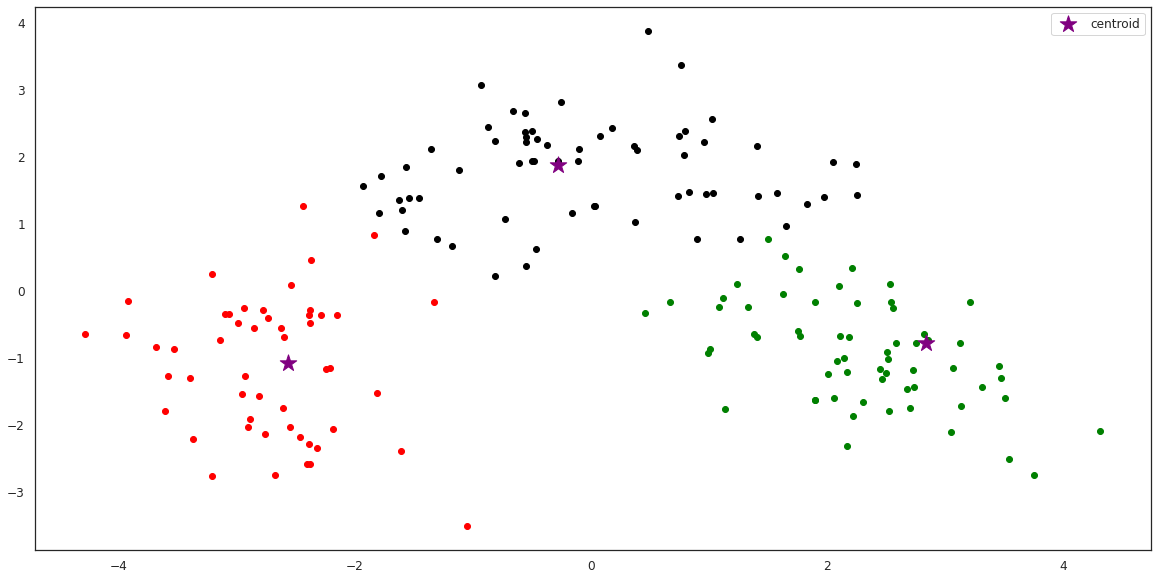

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(df1.PC1, df1.PC2, color='green')
plt.scatter(df2.PC1, df2.PC2, color='red')
plt.scatter(df3.PC1, df3.PC2, color='black')
plt.scatter(centroids_pca[:,0],centroids_pca[:,1],color='purple',marker='*', s=300, label='centroid')
plt.legend()